In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [70]:
!which pip

/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/bin/pip


## The objective is to forecast the directional movement (up or down) of Amazon.com, Inc. (AMZN) stock prices. 
Instead of predicting the exact price, the focus is on binary classification: determining whether the closing price on the next day will be higher than the opening price. This approach aims to guide decisions on buying or selling stocks based on price movement direction.

The dataset spans from 1997 to 2020, divided into training (1997-2016), validation (2016-2018), and testing (2018-2020) periods. The data is distributed across AMZN_train.csv, AMZN_val.csv, and AMZN_test.csv files for the respective timeframes.

## Data Exploration
In our preliminary analysis, we will import the required libraries and examine the available datasets to identify the data attributes. Utilizing the pandas library, we aim to visualize the variables through plots to detect potential trends in the data. This initial exploration will also involve considering the option of feature engineering to enhance our understanding of the dataset. Let's proceed by loading the pandas library and initiating the exploratory process.

In [71]:
amz_df=pd.read_csv("./datasets/AMZN_train.csv")
amz_val_df=pd.read_csv("./datasets/AMZN_val.csv")
amz_test_df=pd.read_csv("./datasets/AMZN_test.csv")

In [72]:
amz_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [73]:
amz_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [74]:
#Converting Date feature to Datetime Data type
amz_df['Date']=pd.to_datetime(amz_df['Date'])
amz_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [75]:
amz_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4781,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,2006-11-13 22:50:07.404308736,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
min,1997-05-15 00:00:00,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,2002-02-15 00:00:00,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,2006-11-13 00:00:00,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,2011-08-12 00:00:00,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,2016-05-13 00:00:00,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08
std,NaN,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06


In [76]:
# Checking Non Null values in each column
amz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4781 non-null   datetime64[ns]
 1   Open       4781 non-null   float64       
 2   High       4781 non-null   float64       
 3   Low        4781 non-null   float64       
 4   Close      4781 non-null   float64       
 5   Adj Close  4781 non-null   float64       
 6   Volume     4781 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 261.6 KB


There are no missing values in the dataset.

In [77]:
# print the time range
amz_df["Date"].min(), amz_df["Date"].max()

(Timestamp('1997-05-15 00:00:00'), Timestamp('2016-05-13 00:00:00'))

We can plot the stock prices as a function of time. 

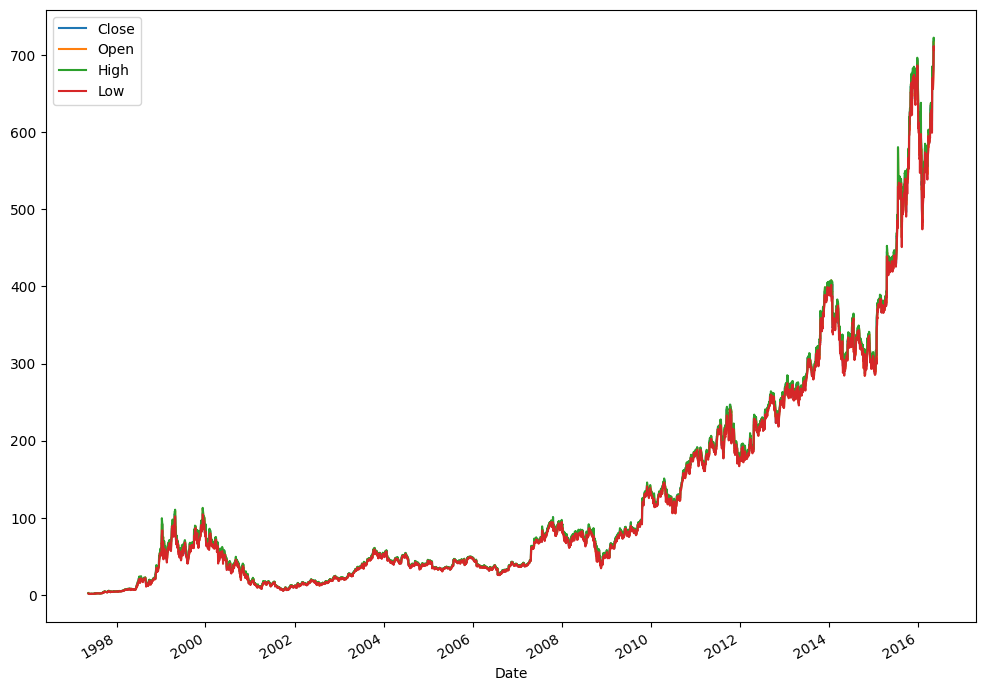

In [78]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)
zm = amz_df.plot(x="Date", y=["Close", "Open", "High", "Low"])

We would like to repeat the same analysis for the validation and testing set, to make sure that they follow a similar distribution and that there are no surprising errors there. We create a function to do that.



In [79]:
def analyse(dataframe):
    """Runs an exploration analysis of the dataframe."""
    print("Shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns, "\n")
    dataframe.info()
    print("\n", dataframe.describe(), "\n")
    print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max())
    dataframe.plot(x="Date", y=["Close", "Open", "High", "Low"])

Shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   6

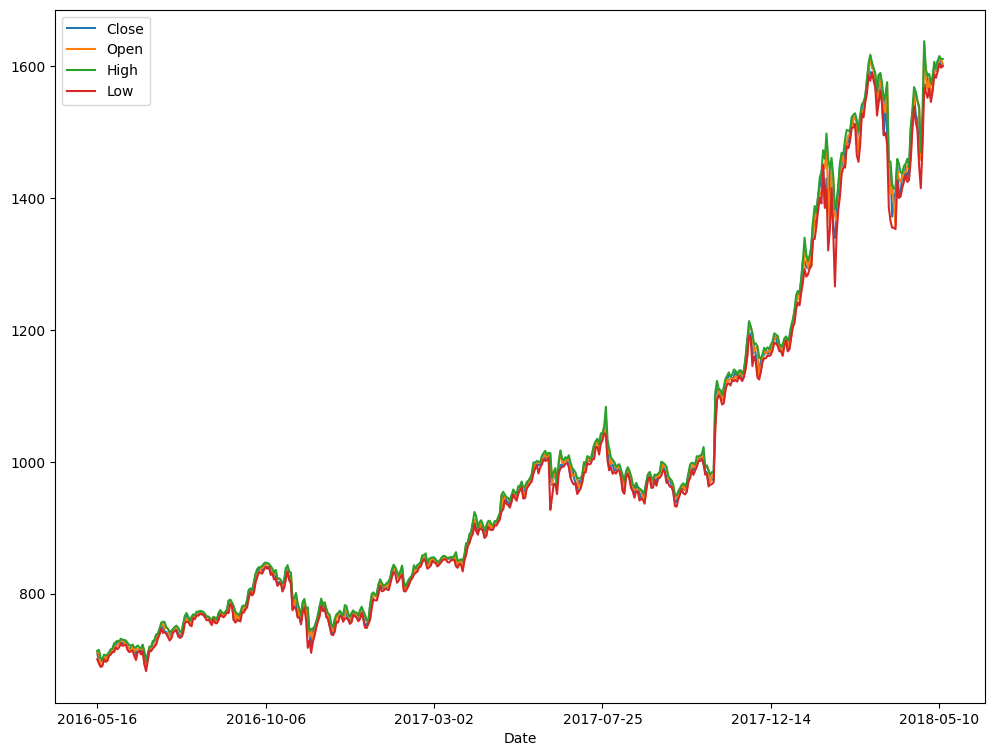

In [80]:
analyse(amz_val_df)

Shape (504, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB

               Open         High          Low        Close    Adj Close  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean   1823.927758  1843.069246  1803.067065  1824.040536  1824.040536   
std     178.129809   179.294163   177.457741   178.470078   178.470078   
min    1346.000000  1396.030029  1307.000000  1343.959961  13

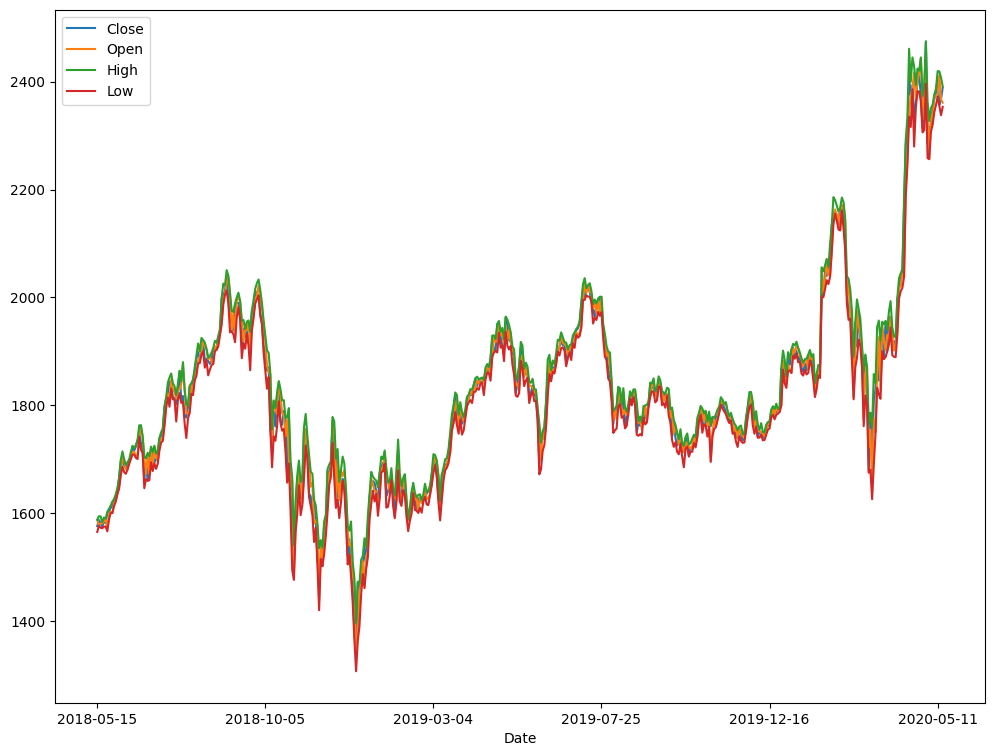

In [81]:
analyse(amz_test_df)

Now we done with our exploration of the data, we can move on to the predictive modeling part of the task. The task was to predict if the next day's closing price will be higher than the opening price. We do not have that information explicitly in our data, so we have to infer it.

This is relatively simple, we just need to compare the closing and opening prices one day in advance.

To achieve that, first, we will make sure that the data is sorted by the date. We can use the sort_values method and pass in the Date column as a parameter, sorting it in ascending order.

Next, we need to shift the DataFrame by one row / one day and compare the prices. Pandas has a method for doing exactly that, the shift method. We specify a period of minus one (so that we shift the data from the next day back). Because it is a logical operation, Pandas would return a True / False result for each comparison. We want this to be presented as 1 / 0 for the machine learning models, so we will map it to type int. To store all of this information, we will create a new column, called Target.

In [82]:
# make sure that our data is sorted by date
amz_df.sort_values(by="Date", inplace=True)
amz_val_df.sort_values(by="Date", inplace=True)
amz_test_df.sort_values(by="Date", inplace=True)


In [83]:
# notice that we shift by a period of '-1', this takes the next day's price direction for the current day
# a positive period will take the days from the past
amz_df["Target"] = (amz_df["Close"] > amz_df["Open"]).shift(periods=-1, fill_value=0).astype(int)

In [84]:
amz_df.head()
amz_df["Target"].value_counts()

Target
1    2392
0    2389
Name: count, dtype: int64

Running the value_counts method on the Target column gives us the distribution. We have 2392 days where the closing price is higher than the opening and 2389 where it is lower.




We will define a function shift which will perform the same task of shift for the other 2 datasets i.e amz_val_df & amz_test_df.

In [85]:
def shift(df):
    df["Target"] = (df["Close"] > df["Open"]).shift(periods=-1, fill_value=0).astype(int)
    return df["Target"].value_counts()

In [86]:
shift(amz_val_df)

Target
0    255
1    248
Name: count, dtype: int64

In [87]:
shift(amz_test_df)

Target
1    255
0    249
Name: count, dtype: int64

At this point, we can start building some machine learning models to predict the target variable. But, before we do that, it might be useful to engineer some additional features that may help us better predict the price direction. In the next section, we will explore some possibilities for doing feature engineering.



## Feature Engineering
We know that the stock prices are time-dependent and that the next day's price depends on prices (and many other things) from previous days.

We want to somehow take into account all the values in the last n days, capturing the trend, or the magnitude of price change.

A simple solution would be to calculate a moving average. With Pandas, we can use the rolling method to calculate moving averages. It provides us with an interface for sliding (in Pandas terminology - rolling) window calculations. The following cells calculate the 3- and 7-days moving average, and add them as a feature into the data set.

Remember that we have our data sorted from before. If the data is not sorted by the date, the results from the rolling() method would be invalid.

In [88]:
amz_df["Moving_Average_3"] = (amz_df["Close"] - amz_df["Open"]).rolling(window=3, min_periods=1).mean()
amz_val_df["Moving_Average_3"] = (amz_val_df["Close"] - amz_val_df["Open"]).rolling(window=3, min_periods=1).mean()
amz_test_df["Moving_Average_3"] = (amz_test_df["Close"] - amz_test_df["Open"]).rolling(window=3, min_periods=1).mean()


In [89]:
amz_df["Moving_Average_7"] = (amz_df["Close"] - amz_df["Open"]).rolling(window=7, min_periods=1).mean()
amz_val_df["Moving_Average_7"] = (amz_val_df["Close"] - amz_val_df["Open"]).rolling(window=7, min_periods=1).mean()
amz_test_df["Moving_Average_7"] = (amz_test_df["Close"] - amz_test_df["Open"]).rolling(window=7, min_periods=1).mean()


In [90]:
amz_df["Today_Direction"] = amz_df["Close"] - amz_df["Open"]
amz_val_df["Today_Direction"] = amz_val_df["Close"] - amz_val_df["Open"]
amz_test_df["Today_Direction"] = amz_test_df["Close"] - amz_test_df["Open"]


In [91]:
amz_df["Price_Range"] = amz_df["High"] - amz_df["Low"]
amz_val_df["Price_Range"] = amz_val_df["High"] - amz_val_df["Low"]
amz_test_df["Price_Range"] = amz_test_df["High"] - amz_test_df["Low"]


In [92]:
# Displaying results
amz_df.sample(5, random_state=2)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_3,Moving_Average_7,Today_Direction,Price_Range
1637,2003-11-17,51.919998,52.189999,49.580002,50.360001,50.360001,12996900,0,-0.926666,-0.585714,-1.559997,2.609997
956,2001-03-01,9.875000,10.687500,9.593750,10.437500,10.437500,10996700,0,-0.187500,-0.160714,0.562500,1.093750
3375,2010-10-13,156.690002,156.789993,153.850006,155.169998,155.169998,5632800,1,0.196666,-0.098572,-1.520004,2.939987
3983,2013-03-15,264.980011,267.260010,260.049988,261.820007,261.820007,4865900,0,-2.410004,-1.045715,-3.160004,7.210022
4709,2016-02-02,570.000000,571.559998,550.090027,552.099976,552.099976,6312000,0,-2.073343,-0.220005,-17.900024,21.469971


## Machine Learning Models
Now we will move on to implementing different machine learning algorithms which are generally used for time series & stock price prediction use cases. 
- Logistic regression
- Decision tree
- Random forest
- Gradient boosting ensemble

So, we will be defining a function called test_model which will train, fit and evaluate the dataset.

In [93]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def test_model(train_df, val_df, test_df, X_cols, y_col):
    # Extracting features and target variable
    X_train, y_train = train_df[X_cols], train_df[y_col]
    X_val, y_val = val_df[X_cols], val_df[y_col]
    X_test, y_test = test_df[X_cols], test_df[y_col]

    # Logistic Regression
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_val)
    lr_accuracy = accuracy_score(y_val, lr_predictions)
    print("Logistic Regression:")
    print(f"Accuracy on Validation Set: {lr_accuracy:.4f}")
    print(classification_report(y_val, lr_predictions))

    # Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    dt_predictions = dt_model.predict(X_val)
    dt_accuracy = accuracy_score(y_val, dt_predictions)
    print("\nDecision Tree:")
    print(f"Accuracy on Validation Set: {dt_accuracy:.4f}")
    print(classification_report(y_val, dt_predictions))

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_val)
    rf_accuracy = accuracy_score(y_val, rf_predictions)
    print("\nRandom Forest:")
    print(f"Accuracy on Validation Set: {rf_accuracy:.4f}")
    print(classification_report(y_val, rf_predictions))

    # Gradient Boosting
    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)
    gb_predictions = gb_model.predict(X_val)
    gb_accuracy = accuracy_score(y_val, gb_predictions)
    print("\nGradient Boosting:")
    print(f"Accuracy on Validation Set: {gb_accuracy:.4f}")
    print(classification_report(y_val, gb_predictions))

# Define target and input features
y_col = "Target"
X_cols = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today_Direction",
    "Price_Range",
    "Moving_Average_3",
    "Moving_Average_7"
]

In [94]:
# Apply the function to the datasets
test_model(amz_df, amz_val_df, amz_test_df, X_cols, y_col)

Logistic Regression:
Accuracy on Validation Set: 0.5070
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       255
           1       0.00      0.00      0.00       248

    accuracy                           0.51       503
   macro avg       0.25      0.50      0.34       503
weighted avg       0.26      0.51      0.34       503


Decision Tree:
Accuracy on Validation Set: 0.5288
              precision    recall  f1-score   support

           0       0.52      0.82      0.64       255
           1       0.55      0.23      0.32       248

    accuracy                           0.53       503
   macro avg       0.54      0.52      0.48       503
weighted avg       0.54      0.53      0.48       503



/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div


Random Forest:
Accuracy on Validation Set: 0.5189
              precision    recall  f1-score   support

           0       0.51      0.89      0.65       255
           1       0.55      0.13      0.21       248

    accuracy                           0.52       503
   macro avg       0.53      0.51      0.43       503
weighted avg       0.53      0.52      0.44       503


Gradient Boosting:
Accuracy on Validation Set: 0.5089
              precision    recall  f1-score   support

           0       0.51      0.97      0.67       255
           1       0.53      0.04      0.07       248

    accuracy                           0.51       503
   macro avg       0.52      0.50      0.37       503
weighted avg       0.52      0.51      0.37       503



Indeed it does, the gradient boosting classifier & Decision Tree outperform previous models and scored 52.09%!

We find out that gradient boosting & Decision Tree works best for this data set. In the next section, we will train a deep learning model with the aim to outperform the baseline set here, i.e., Accuracy = 52.09%

## Deep Learning Model

In [95]:
import tensorflow as tf

RANDOM_SEED=0.42
# set seed for reproducibility of results
tf.random.set_seed(RANDOM_SEED)

print("Tensorflow version", tf.__version__)

Tensorflow version 2.13.0


In [96]:
cols=["Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today_Direction",
    "Price_Range",
    "Moving_Average_3",
    "Moving_Average_7"]


X_train= amz_df[cols]
y_train=amz_df['Target']
X_val= amz_val_df[cols]
y_val= amz_val_df['Target']

In [97]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='random_normal', bias_initializer='zeros')
])

In [98]:
# this configures the model's loss function, weight optimizer, and metrics to keep track of
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['AUC']
)

We are going to train our model for 50 epochs, and keep track of its loss (binary_crossentropy) and AUC values during each epoch.
To prevent overfitting, we are implementing two callbacks: (1) learning rate scheduler, and (2) early stopping callback.

In [99]:
def learning_rate_scheduler(epoch, learning_rate):
    """Learning rate decay callback."""
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.01)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

In [100]:
# the model.fit(...) method returns a 'history' object with stats about the training
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1,
    callbacks=[early_stopping_callback, learning_rate_callback])

Epoch 1/50
150/150 [==============================] - 0s 764us/step - loss: 155.4588 - auc: 0.5143 - val_loss: 6.8623 - val_auc: 0.5020 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 0s 340us/step - loss: 5.0364 - auc: 0.5033 - val_loss: 4.0208 - val_auc: 0.4815 - lr: 0.0010
Epoch 3/50
150/150 [==============================] - 0s 326us/step - loss: 3.0191 - auc: 0.4995 - val_loss: 1.5773 - val_auc: 0.5099 - lr: 0.0010
Epoch 4/50
150/150 [==============================] - 0s 345us/step - loss: 2.4835 - auc: 0.4990 - val_loss: 0.8864 - val_auc: 0.5084 - lr: 0.0010
Epoch 5/50
150/150 [==============================] - 0s 330us/step - loss: 1.5849 - auc: 0.5005 - val_loss: 0.7240 - val_auc: 0.5117 - lr: 0.0010
Epoch 6/50
150/150 [==============================] - 0s 330us/step - loss: 1.2641 - auc: 0.5036 - val_loss: 0.8221 - val_auc: 0.4900 - lr: 9.9005e-04
Epoch 7/50
150/150 [==============================] - 0s 323us/step - loss: 1.0752 - auc: 0.5027 - val_loss: 0.7

We observe that both the training and the validation AUC are very close to 0.5, improving the overall score only over the logistic regression model.



In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 10)                21        
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 192 (772.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 21 (88.00 Byte)
______________

Below, we plot the train and validation loss and AUC values as a function of the epoch. We use the matplotlib library, and the history object to do that.

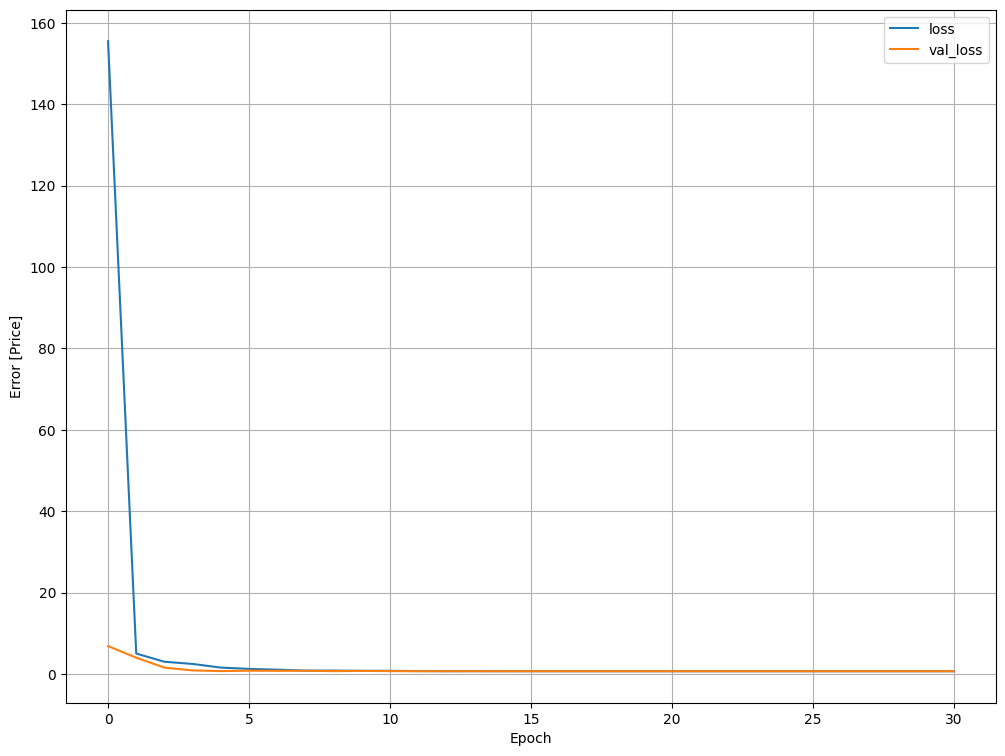

In [102]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

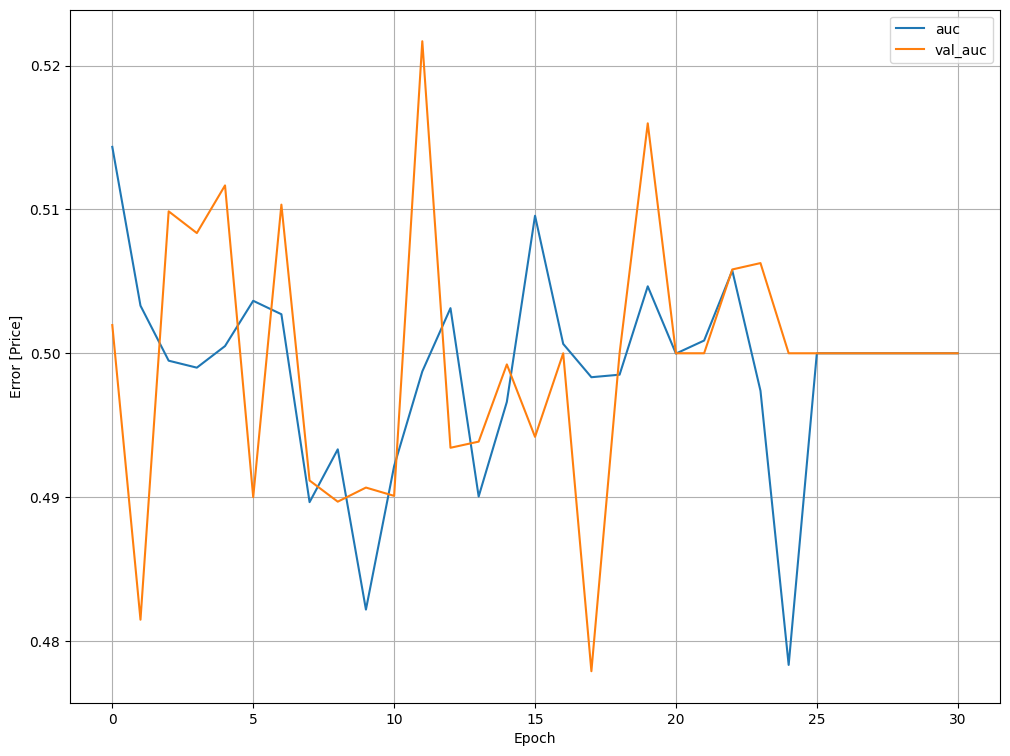

In [103]:
plt.plot(history.history['auc'], label='auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

## Conclusion
The gradient boosting classifier & Logisitic Classifier provided the best AUC score on the validation set. It is a common machine learning practice to train multiple models on the same train/validation data set and provide a model that works best. To simulate a production environment, we have held the test set aside until now.

In the next cell, we are going to evaluate the performance of the gradient boosting classifier on the test set. This is simple as calling plot_roc_curve with the test set instead of the validation one.

As a bonus, in the last cell, we are showing a feature importance plot, which plots the importance of each feature in regard to the predictive performance of the model (the higher the value the more important the feature is for determining the value of the target variable).

In [104]:
X_test=amz_test_df[cols]
y_test=amz_test_df['Target']

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("\nGradient Boosting:")
print(f"Accuracy on Test Set: {gb_accuracy:.4f}")
print(classification_report(y_test, gb_predictions))

gb_accuracy = accuracy_score(y_test, gb_predictions)
print("\nGradient Boosting:")
print(f"Accuracy on Test Set: {gb_accuracy:.4f}")
print(classification_report(y_test, gb_predictions))


Gradient Boosting:
Accuracy on Test Set: 0.5000
              precision    recall  f1-score   support

           0       0.50      0.93      0.65       249
           1       0.54      0.08      0.14       255

    accuracy                           0.50       504
   macro avg       0.52      0.51      0.39       504
weighted avg       0.52      0.50      0.39       504


Gradient Boosting:
Accuracy on Test Set: 0.5000
              precision    recall  f1-score   support

           0       0.50      0.93      0.65       249
           1       0.54      0.08      0.14       255

    accuracy                           0.50       504
   macro avg       0.52      0.51      0.39       504
weighted avg       0.52      0.50      0.39       504



In [105]:
     # Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression:")
print(f"Accuracy on Test Set: {lr_accuracy:.4f}")
print(classification_report(y_test, lr_predictions))


Logistic Regression:
Accuracy on Test Set: 0.4940
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       249
           1       0.00      0.00      0.00       255

    accuracy                           0.49       504
   macro avg       0.25      0.50      0.33       504
weighted avg       0.24      0.49      0.33       504



/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

## Hyper Paramter tuning
From the above two models, Logistic Regression Classifier is performing better. So we will go for Logisitc Regressor for this project. Now we will perform Hyper parmater tuning to increase the accuracy of the model. To perform hyperparameter tuning for the Logistic Regression model, we'll use tools like Grid Search or Random Search along with cross-validation.

In [106]:
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model
lr_model = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear'],  # Solver for optimization problem
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on the test set using the best hyperparameters
best_lr_model = grid_search.best_estimator_
lr_predictions = best_lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("\nLogistic Regression (with Hyperparameter Tuning):")
print(f"Accuracy on Test Set: {lr_accuracy:.4f}")
print(classification_report(y_test, lr_predictions))


/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression (with Hyperparameter Tuning):
Accuracy on Test Set: 0.4940
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       249
           1       0.50      0.54      0.52       255

    accuracy                           0.49       504
   macro avg       0.49      0.49      0.49       504
weighted avg       0.49      0.49      0.49       504



It's not uncommon for the accuracy to decrease after hyperparameter tuning. The reason behind this can be that the model might have been overfitting to the training data before tuning, and the hyperparameters selected during tuning may result in a more generalized model. But due to limited time, we will go for the Regressor without any hyperparameter tuning. But I'll breifly mention the steps how to deal with overfitting for this problem. 
Identifying and addressing overfitting is crucial to build a model that generalizes well to new, unseen data. Here are steps to find and overcome overfitting:

## Steps to Identify Overfitting:
1. Performance Comparison:
   Evaluate the model on both the training and test sets.
   Compare performance metrics such as accuracy, precision, recall, F1-score, and AUC on both sets.
2. Learning Curves:
   Plot learning curves to visualize the model's performance on both sets across different training set sizes
   
  

In [107]:
# Evaluate on the training set
train_predictions = best_lr_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on Training Set:", train_accuracy)

# Evaluate on the test set
test_predictions = best_lr_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on Test Set:", test_accuracy)


Accuracy on Training Set: 0.5122359339050407
Accuracy on Test Set: 0.49404761904761907


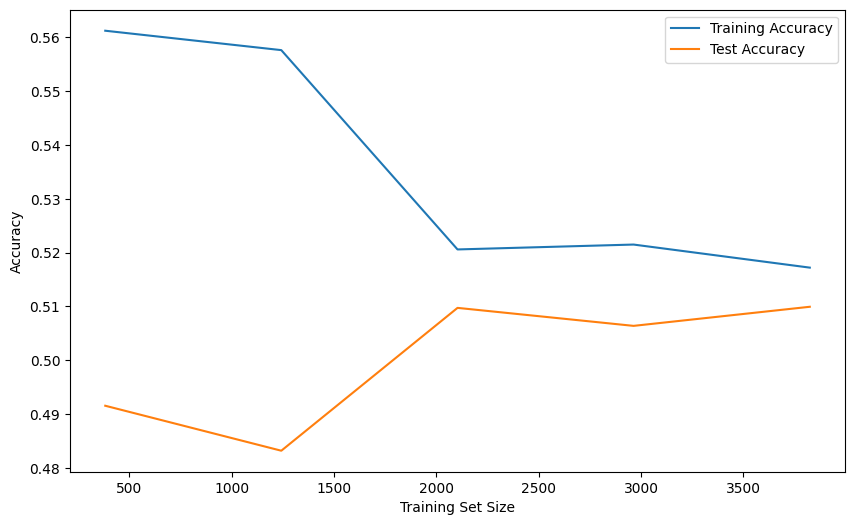

In [108]:
# Plotting Learning Curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_lr_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**There is a significant gap between the two curves, it indicates potential overfitting.**

## Performing Regularization on the model

In [109]:
from sklearn.linear_model import LogisticRegression

# Increase regularization strength
tuned_lr_model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
tuned_lr_model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the Logistic Regression model with tuned hyperparameters
tuned_lr_model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

# Fit the model to the training data
tuned_lr_model.fit(X_train, y_train)

# Make predictions on the test set
tuned_lr_predictions = tuned_lr_model.predict(X_test)

# Evaluate the accuracy
tuned_lr_accuracy = accuracy_score(y_test, tuned_lr_predictions)

# Display the results
print("Logistic Regression with Regularization:")
print(f"Accuracy on Test Set: {tuned_lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, tuned_lr_predictions))


Logistic Regression with Regularization:
Accuracy on Test Set: 0.4940

Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       249
           1       0.00      0.00      0.00       255

    accuracy                           0.49       504
   macro avg       0.25      0.50      0.33       504
weighted avg       0.24      0.49      0.33       504



/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/witchapatissariyawat/.pyenv/versions/stock-machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

Still after applying regularizaation the accuracy is somehow similiar. So there might be other factors which we solved to reduce overfitting for this model. Example:

1. **Feature Selection:**
    Identify and remove irrelevant or redundant features.
    Select a subset of the most informative features.
    
2. **Ensemble Methods:**
    Explore ensemble methods like Random Forest or Gradient Boosting.
    Ensemble models can mitigate overfitting and provide better generalization.
    
3. **Collect More Data:**
   If feasible, collecting additional data can help improve model generalization.
   
4. **Early Stopping:**
   If applicable (e.g., in iterative algorithms like gradient boosting), use early stopping to halt training when performance on a validation set starts to degrade.
